# BLOOD PRESSURE (RANDOM FOREST)

Reference = https://www.datacamp.com/tutorial/random-forests-classifier-python

In [1]:
import pandas as pd

df = pd.read_csv('blood_pressure_readings.csv')

df.head()


,Patient_ID,Date,Systolic_BP,Diastolic_BP,Heart_Rate,Age,BMI,Smoking,Physical_Activity
0,1,2024-01-01,167,93,78,50,19.8,No,High
1,2,2024-01-02,159,85,77,39,24.7,Yes,High
2,3,2024-01-03,93,86,58,22,26.1,Yes,Medium
3,4,2024-01-04,108,89,85,43,32.6,Yes,Medium
4,5,2024-01-05,135,73,72,33,20.8,Yes,High


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Patient_ID         100 non-null    int64  
 1   Date               100 non-null    object 
 2   Systolic_BP        100 non-null    int64  
 3   Diastolic_BP       100 non-null    int64  
 4   Heart_Rate         100 non-null    int64  
 5   Age                100 non-null    int64  
 6   BMI                100 non-null    float64
 7   Smoking            100 non-null    object 
 8   Physical_Activity  100 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 7.2+ KB


In [3]:
df['Physical_Activity'].value_counts()

Physical_Activity
High      40
Low       33
Medium    27
Name: count, dtype: int64

In [4]:
df.shape

(100, 9)

In [5]:
df.isna().sum()

Patient_ID           0
Date                 0
Systolic_BP          0
Diastolic_BP         0
Heart_Rate           0
Age                  0
BMI                  0
Smoking              0
Physical_Activity    0
dtype: int64

In [6]:
df = df.drop(['Date','Smoking','BMI','Patient_ID', 'Age'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Systolic_BP        100 non-null    int64 
 1   Diastolic_BP       100 non-null    int64 
 2   Heart_Rate         100 non-null    int64 
 3   Physical_Activity  100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [8]:
df.head()

,Systolic_BP,Diastolic_BP,Heart_Rate,Physical_Activity
0,167,93,78,High
1,159,85,77,High
2,93,86,58,Medium
3,108,89,85,Medium
4,135,73,72,High


## Data PreProcessing


**Summary of Preprocessing Steps**

*Drop unnecessary columns.

*Encode categorical variables.

*Define and create the target variable.

*Prepare features and target for modeling.

*Split the dataset into training and testing sets.

*Normalize/standardize features if needed.

*Check and handle missing values.

**When to Use reset_index:**

1]After Dropping Rows:
If row is dropped  and the index is no longer sequential, resetting the index will reorder it.

2]To Clean Up:
If the index column is no longer needed and  want to clean, default integer index.

3]When Preparing for Modeling:
Ensures that the index doesn’t interfere with the model training or data processing.

4]When It Might Not Be Necessary:
No Index Issues: If no operations is performed that affect the index (like dropping rows) and the index is already clean, it might not be needed.
Example Usage:df.reset_index(drop=True, inplace=True)
drop=True: Ensures the old index is dropped and not added as a new column.

If  changes is made to the DataFrame (like dropping rows) and want a clean index, then using reset_index is a good practice. If not, it’s optional. 

In [9]:
df.reset_index(inplace=True)
df.head()

,index,Systolic_BP,Diastolic_BP,Heart_Rate,Physical_Activity
0,0,167,93,78,High
1,1,159,85,77,High
2,2,93,86,58,Medium
3,3,108,89,85,Medium
4,4,135,73,72,High


#### One Hot Encoding

drop_first=True: This parameter reduces redundancy by dropping one category (like "Low" in the example), preventing multicollinearity.

In [10]:
df_encoded = pd.get_dummies(df, columns=['Physical_Activity'], drop_first=True)


In [11]:
df.head()

,index,Systolic_BP,Diastolic_BP,Heart_Rate,Physical_Activity
0,0,167,93,78,High
1,1,159,85,77,High
2,2,93,86,58,Medium
3,3,108,89,85,Medium
4,4,135,73,72,High


#### Define Target Variable

I  created a target variable (Health_Status) based on the blood pressure readings to classify them as "Normal" or "Abnormal" (High/medium)

In [12]:
# df_encoded['Health_Status'] = df_encoded.apply(
#     lambda row: 'Normal' if (row['Systolic_BP'] < 120 and row['Diastolic_BP'] < 80) else 'Abnormal', axis=1
# )
df_encoded['Health_Status'] = df_encoded.apply(
    lambda row: 'Normal' if (row['Systolic_BP'] < 120 and row['Diastolic_BP'] < 80) else 
                'Elevated' if (row['Systolic_BP'] < 130 and row['Diastolic_BP'] < 80) else 
                'High Blood Pressure Stage 1' if (row['Systolic_BP'] < 140 or row['Diastolic_BP'] < 90) else 
                'High Blood Pressure Stage 2', axis=1
)


In [105]:
print(df_encoded)

    index  Systolic_BP  Diastolic_BP  Heart_Rate  Physical_Activity_Low  \
0       0          167            93          78                  False   
1       1          159            85          77                  False   
2       2           93            86          58                  False   
3       3          108            89          85                  False   
4       4          135            73          72                  False   
..    ...          ...           ...         ...                    ...   
95     95          179           105          78                  False   
96     96          169            73          81                  False   
97     97          126            94          75                  False   
98     98          173           100          96                  False   
99     99          122            76          68                  False   

    Physical_Activity_Medium                Health_Status  
0                      False  High Bloo

In [106]:
df.head()

,index,Systolic_BP,Diastolic_BP,Heart_Rate,Physical_Activity
0,0,167,93,78,High
1,1,159,85,77,High
2,2,93,86,58,Medium
3,3,108,89,85,Medium
4,4,135,73,72,High


#### Separate Features and Target

Next, separate the features (input variables) from the target variable (Health_Status).

In [107]:
X = df_encoded.drop(['Health_Status'], axis=1)  # Features
y = df_encoded['Health_Status']  # Target


When we prepare the data for training a machine learning model, we need to separate the features (input variables) from the target variable (the outcome to be predicted).


Why Drop the Target Column (Health_Status)?
Features (X): These are the input variables that  model will use to make predictions. In this case, these include Systolic_BP, Diastolic_BP, Heart_Rate, and the encoded Physical_Activity columns.

Target (y): This is the outcome or label that  model will learn to predict, which in this case is Health_Status.

Reason for Dropping the Target Column (Health_Status):
When we prepare the X (features) DataFrame, we drop Health_Status because model need not learn from the target itself (which would be cheating). The model should only use the features to learn how to predict the target.

In [108]:
df.head()

,index,Systolic_BP,Diastolic_BP,Heart_Rate,Physical_Activity
0,0,167,93,78,High
1,1,159,85,77,High
2,2,93,86,58,Medium
3,3,108,89,85,Medium
4,4,135,73,72,High


####  Split Data into Training and Testing Sets

Split the data into training and testing sets to evaluate the model's performance:

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
print("Total number of training samples:", len(X_train))
print("Total number of testing samples:", len(X_test))

Total number of training samples: 80
Total number of testing samples: 20


Label Distribution:
 Health_Status
High Blood Pressure Stage 1    54
High Blood Pressure Stage 2    15
Abnormal                        8
Elevated                        3
Name: count, dtype: int64


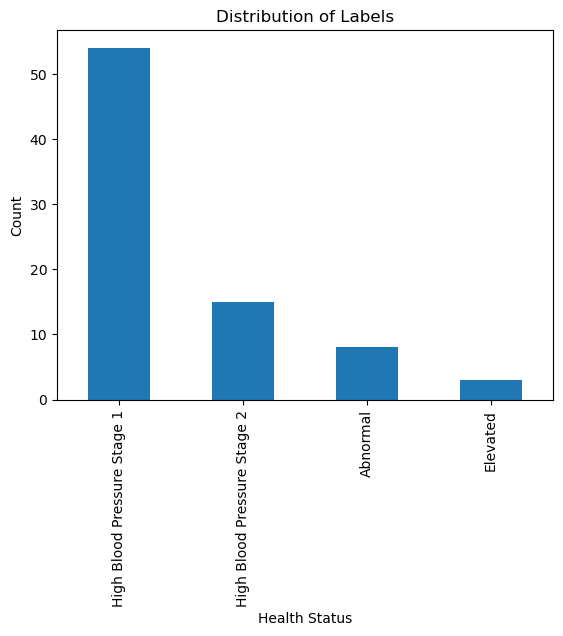

In [111]:
# inspect distribution of labels
import pandas as pd

# Assuming you have your training data in a DataFrame 'train_data'
# and labels in 'y_train'

# Check the distribution of labels
label_counts = y_train.value_counts()
print("Label Distribution:\n", label_counts)

# Plot the distribution if needed
import matplotlib.pyplot as plt

label_counts.plot(kind='bar')
plt.title('Distribution of Labels')
plt.xlabel('Health Status')
plt.ylabel('Count')
plt.show()


#### Train the Random Forest Model

Now, training the Random Forest model on the training data:

In [112]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### Evaluate the Model

After training, evaluate the model on the testing set to check its performance:

In [113]:
    from sklearn.metrics import classification_report, accuracy_score

    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


Accuracy: 0.85
                             precision    recall  f1-score   support

                   Abnormal       0.00      0.00      0.00         2
High Blood Pressure Stage 1       0.73      1.00      0.84         8
High Blood Pressure Stage 2       1.00      0.90      0.95        10

                   accuracy                           0.85        20
                  macro avg       0.58      0.63      0.60        20
               weighted avg       0.79      0.85      0.81        20



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]


## FINE TUNING the MODEL

**What is Fine-Tuning?**
Fine-tuning in machine learning involves optimizing the hyperparameters of the model to improve its performance. Hyperparameters are settings that can be adjusted before training the model, such as the number of trees in a Random Forest or the depth of those trees. Unlike model parameters (which are learned during training), hyperparameters need to be set beforehand.

**Why Fine-Tune?**

Fine-tuning can:

-Improve model accuracy.

-Reduce overfitting or underfitting.

-Enhance generalization to new data.

#### Import Necessary Libraries

In [114]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score, classification_report


#### Setting up the data

In [115]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Define a Parameter Grid

Define the hyperparameters  to tune. For Random Forest, some key hyperparameters include:

***n_estimators***: Number of trees in the forest.

***max_depth***: Maximum depth of each tree.

***min_samples_split***: Minimum number of samples required to split an internal node.

***min_samples_leaf***: Minimum number of samples required to be at a leaf node.

***max_features***: Number of features to consider when looking for the best split.

In [116]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']  
# }
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [10, 20],
#     'min_samples_split': [2, 5]
# }

#### Performing Grid Search

In [117]:
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,  # 5-fold cross-validation
#                            n_jobs=-1,  # Use all available cores
#                            verbose=2)

# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)
# Initialize the grid search
# grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                            param_grid=param_grid,
#                            cv=5,
#                            n_jobs=-1,
#                            verbose=2)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

#### Evaluate the Best Model

In [118]:
# # Get the best parameters from the grid search
# best_params = grid_search.best_params_
# print(f"Best parameters: {best_params}")

# # Train a new model with the best parameters
# best_rf = RandomForestClassifier(**best_params, random_state=42)
# best_rf.fit(X_train, y_train)

# # Predict on the test set
# y_pred = best_rf.predict(X_test)

# # Evaluate the model
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# print(classification_report(y_test, y_pred))


### Prediction Pipelining

In [120]:
# Example input values
systolic_bp = 200
diastolic_bp = 80

# Get prediction
health_status = predict_health_status(systolic_bp, diastolic_bp)
print(f"Predicted Health Status: {health_status}")


Predicted Health Status: Abnormal


In [36]:
# import pandas as pd
# import ipywidgets as widgets
# from IPython.display import display

# # Assume 'best_rf' is your trained and fine-tuned model

# def predict_health_status(systolic_bp, diastolic_bp):
#     # Create a DataFrame for the input data
#     input_data = pd.DataFrame({
#         'Systolic_BP': [systolic_bp],
#         'Diastolic_BP': [diastolic_bp],
#         'Heart_Rate': [0],  # Placeholder value, adjust if necessary
#         'Age': [0],         # Placeholder value, adjust if necessary
#         'Physical_Activity': ['Low']  # Placeholder value, adjust if necessary
#     })

#     # Fill in or drop columns if necessary
#     input_data.fillna(0, inplace=True)  # Adjust based on your model's requirements

#     # Predict
#     prediction = best_rf.predict(input_data)
    
#     # Map prediction to readable label
#     health_status = {0: 'Normal', 1: 'Abnormal'}
#     return health_status[prediction[0]]

# # Define widgets
# systolic_bp_widget = widgets.IntText(description="Systolic BP:")
# diastolic_bp_widget = widgets.IntText(description="Diastolic BP:")

# def on_button_click(b):
#     systolic_bp = systolic_bp_widget.value
#     diastolic_bp = diastolic_bp_widget.value
#     status = predict_health_status(systolic_bp, diastolic_bp)
#     print(f"Health Status: {status}")

# # Button to trigger prediction
# button = widgets.Button(description="Predict Health Status")
# button.on_click(on_button_click)

# # Display widgets
# display(systolic_bp_widget, diastolic_bp_widget, button)


In [38]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.ensemble import RandomForestClassifier

# # Example encoder and model if they're not already defined
# # encoder = OneHotEncoder(sparse=False)
# # best_rf = RandomForestClassifier() 

# # Replace with your actual encoder and model
# # Note: Ensure your encoder and model are trained and available in the same notebook.

# def preprocess_input_data(input_data, encoder, feature_names):
#     input_df = pd.DataFrame(input_data, columns=['Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Age', 'Physical_Activity'])
    
#     # Encode categorical variables
#     encoded_features = encoder.transform(input_df[['Physical_Activity']])
#     encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Physical_Activity']))
    
#     # Drop the original categorical column and join the encoded columns
#     input_df = input_df.drop(['Physical_Activity'], axis=1)
#     input_df = input_df.join(encoded_df)
    
#     # Ensure consistent feature columns
#     for col in feature_names:
#         if col not in input_df.columns:
#             input_df[col] = 0  # or some default value
    
#     input_df = input_df[feature_names]
    
#     return input_df

# def predict_health_status(systolic_bp, diastolic_bp, heart_rate, age, physical_activity):
#     input_data = {
#         'Systolic_BP': [systolic_bp],
#         'Diastolic_BP': [diastolic_bp],
#         'Heart_Rate': [heart_rate],
#         'Age': [age],
#         'Physical_Activity': [physical_activity]
#     }
    
#     # Ensure the feature names match those used during training
#     feature_names = ['Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Age'] + list(encoder.get_feature_names_out(['Physical_Activity']))
    
#     # Preprocess input data
#     input_df = preprocess_input_data(input_data, encoder, feature_names)
    
#     # Predict
#     prediction = best_rf.predict(input_df)
    
#     # Map prediction to readable label
#     health_status = {0: 'Normal', 1: 'Abnormal'}
#     return health_status[prediction[0]]

# # Example usage
# systolic_bp = int(input("Enter Systolic BP: "))
# diastolic_bp = int(input("Enter Diastolic BP: "))
# heart_rate = int(input("Enter Heart Rate: "))
# age = int(input("Enter Age: "))
# physical_activity = input("Enter Physical Activity (High/Medium): ")

# status = predict_health_status(systolic_bp, diastolic_bp, heart_rate, age, physical_activity)
# print(f"Health Status: {status}")


In [48]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# # Define your prediction function
# def predict_health_status(systolic_bp, diastolic_bp):
#     # Create a DataFrame for the input data with all required features
#     input_data = pd.DataFrame({
#         'Systolic_BP': [systolic_bp],
#         'Diastolic_BP': [diastolic_bp],
#         'Heart_Rate': [0],  # Set default or placeholder values
#         'Physical_Activity_Low': [0],
#         'Physical_Activity_Medium': [0],
#         'index': [0]
#     })
    
#     # Make the prediction
#     prediction = best_rf.predict(input_data)
    
#     # Map the prediction to the health status
#     return 'Normal' if prediction[0] == 'Normal' else 'Abnormal'

# # Example usage
# systolic_bp = float(input("Enter Systolic BP: "))
# diastolic_bp = float(input("Enter Diastolic BP: "))

# health_status = predict_health_status(systolic_bp, diastolic_bp)
# print(f"Predicted Health Status: {health_status}")


In [88]:
print(X.columns)


Index(['index', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate',
       'Physical_Activity_Low', 'Physical_Activity_Medium'],
      dtype='object')


In [121]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier

# # Define your prediction function with the correct feature columns
# def predict_health_status(systolic_bp, diastolic_bp):
#     # Create a DataFrame with all required features and their default values
#     input_data = pd.DataFrame({
#         'index': [0],  # Placeholder for 'index'
#         'Systolic_BP': [systolic_bp],
#         'Diastolic_BP': [diastolic_bp],
#         'Heart_Rate': [0],  # Placeholder for 'Heart_Rate'
#         'Physical_Activity_Low': [0],  # Placeholder for 'Physical_Activity_Low'
#         'Physical_Activity_Medium': [0]  # Placeholder for 'Physical_Activity_Medium'
#     })
    
#     # Make the prediction
#     prediction = best_rf.predict(input_data)
    
#     # Map the prediction to the health status
#     return 'Normal' if prediction[0] == 'Normal' else 'Abnormal'

# # Example usage
# systolic_bp = float(input("Enter Systolic BP: "))
# diastolic_bp = float(input("Enter Diastolic BP: "))

# health_status = predict_health_status(systolic_bp, diastolic_bp)
# print(f"Predicted Health Status: {health_status}")


In [90]:
# Inspect the distribution of your target labels
print(df_encoded['Health_Status'].value_counts())


Health_Status
High Blood Pressure Stage 1    62
High Blood Pressure Stage 2    25
Normal                         10
Elevated                        3
Name: count, dtype: int64


In [92]:
# Display the importance of each feature
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Test the prediction function with different values
print(predict_health_status(120, 80))  # Test with your input


                    Feature  Importance
2              Diastolic_BP    0.384787
1               Systolic_BP    0.343880
0                     index    0.136969
3                Heart_Rate    0.113735
4     Physical_Activity_Low    0.010631
5  Physical_Activity_Medium    0.009998
Abnormal


In [93]:
# pip install --upgrade scikit-learn imbalanced-learn


In [122]:
# import numpy as np
# import pandas as pd
# from sklearn.utils import resample

# # Convert y_train to a NumPy array
# y_train_array = y_train.to_numpy()

# # Combine the training data
# X_train_combined = np.concatenate([X_train, y_train_array.reshape(-1, 1)], axis=1)

# # Separate majority and minority classes
# majority_class = X_train_combined[X_train_combined[:, -1] == 'Abnormal']
# minority_class = X_train_combined[X_train_combined[:, -1] == 'Normal']

# # Upsample minority class
# minority_upsampled = resample(minority_class,
#                               replace=True,
#                               n_samples=len(majority_class),
#                               random_state=42)

# # Combine majority class with upsampled minority class
# X_train_balanced = np.vstack([majority_class, minority_upsampled])
# y_train_balanced = X_train_balanced[:, -1]
# X_train_balanced = X_train_balanced[:, :-1]

# # Convert back to DataFrame if necessary
# X_train_balanced = pd.DataFrame(X_train_balanced, columns=X.columns)
# y_train_balanced = pd.Series(y_train_balanced)

# # Train model on balanced data
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train_balanced, y_train_balanced)


In [123]:
# from sklearn.metrics import classification_report, accuracy_score

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model
# print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
# print(classification_report(y_test, y_pred))


In [124]:
# def predict_health_status(systolic_bp, diastolic_bp):
#     # Create a DataFrame with input data
#     input_data = pd.DataFrame({
#         'Systolic_BP': [systolic_bp],
#         'Diastolic_BP': [diastolic_bp],
#         'Heart_Rate': [0],  # Placeholder value if not used
#         'Physical_Activity_Low': [0],  # Placeholder value if not used
#         'Physical_Activity_Medium': [0]  # Placeholder value if not used
#     }, columns=X.columns)  # Ensure the columns match the training data

#     # Check for missing values and fill them
#     input_data = input_data.fillna(0)  # Fill NaN with 0 or use another appropriate value

#     # Make the prediction
#     prediction = model.predict(input_data)

#     # Map the prediction to the health status
#     return 'Normal' if prediction[0] == 'Normal' else 'Abnormal'


#### Check Model Training Data and Labels
To ensure your training data is well-balanced and accurately labeled, follow these steps:

In [126]:
# # inspect distribution of labels
# import pandas as pd

# # Assuming you have your training data in a DataFrame 'train_data'
# # and labels in 'y_train'

# # Check the distribution of labels
# label_counts = y_train.value_counts()
# print("Label Distribution:\n", label_counts)

# # Plot the distribution if needed
# import matplotlib.pyplot as plt

# label_counts.plot(kind='bar')
# plt.title('Distribution of Labels')
# plt.xlabel('Health Status')
# plt.ylabel('Count')
# plt.show()


In [127]:
# # checking for imbalance
# from imblearn.over_sampling import SMOTE

# # Create the SMOTE object
# smote = SMOTE(random_state=42)

# # Fit SMOTE on the training data
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# # Check the new distribution
# resampled_label_counts = pd.Series(y_resampled).value_counts()
# print("Resampled Label Distribution:\n", resampled_label_counts)


In [128]:
def predict_health_status(systolic, diastolic):
    prediction_prob = model.predict_proba([[systolic, diastolic]])
    print(f"Prediction probabilities: {prediction_prob}")
    predicted_class = model.predict([[systolic, diastolic]])[0]
    return 'Normal' if predicted_class == 0 else 'Abnormal'


In [129]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                             precision    recall  f1-score   support

                   Abnormal       0.00      0.00      0.00         2
High Blood Pressure Stage 1       0.73      1.00      0.84         8
High Blood Pressure Stage 2       1.00      0.90      0.95        10

                   accuracy                           0.85        20
                  macro avg       0.58      0.63      0.60        20
               weighted avg       0.79      0.85      0.81        20



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]


In [132]:
# from sklearn.metrics import roc_curve

# y_probs = model.predict_proba(X_test)[:, 1]
# fpr, tpr, thresholds = roc_curve(y_test, y_probs)


In [131]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print(classification_report(y_test, y_pred))


Confusion Matrix:
 [[0 2 0]
 [0 8 0]
 [0 1 9]]
                             precision    recall  f1-score   support

                   Abnormal       0.00      0.00      0.00         2
High Blood Pressure Stage 1       0.73      1.00      0.84         8
High Blood Pressure Stage 2       1.00      0.90      0.95        10

                   accuracy                           0.85        20
                  macro avg       0.58      0.63      0.60        20
               weighted avg       0.79      0.85      0.81        20



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  >>> y_true = [0, 1, 2, 0, 1, 2]


In [133]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train your model on the resampled data
model.fit(X_resampled, y_resampled)


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\pc\anaconda3\Lib\site-packages\imblearn\utils\_validation.py)